# Data science safe home

Is there?

- [Chapter 1: Introduction ](#Introduction)
- [Chapter 2: A Crash Course in Python ](#A-Crash-Course-in-Python)
- [Chapter 3: Visualizing Data](#Visualizing-Data)
- [Chapter 4: Linear Algebra](#Linear-Algebra)
- [Chapter 5: Statistics](#Statistics)
- [Chapter 6: Probability](#Probability)
- [Chapter 7: Hypothesis and Inference](#Hypothesis-and-Inference)
- [Chapter 8: Gradient Descent](#Gradient-Descent)


## Introduction

In [2]:

##########################
#                        #
# FINDING KEY CONNECTORS #
#                        #
##########################

users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" },
    { "id": 10, "name": "Jen" }
]

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]


# first give each user an empty list
for user in users:
    user["friends"] = []

# and then populate the lists with friendships
for i, j in friendships:
    # this works because users[i] is the user whose id is i
    users[i]["friends"].append(users[j]) # add i as a friend of j
    users[j]["friends"].append(users[i]) # add j as a friend of i

def number_of_friends(user):
    """how many friends does _user_ have?"""
    return len(user["friends"]) # length of friend_ids list

total_connections = sum(number_of_friends(user)
                        for user in users) # 24

num_users = len(users)
avg_connections = total_connections / num_users # 2.4

# print all variables
print(total_connections)
print(num_users)
print(avg_connections)

24
11
2.1818181818181817


In [4]:
################################
#                              #
# DATA SCIENTISTS YOU MAY KNOW #
#                              #
################################

def friends_of_friend_ids_bad(user):
    # "foaf" is short for "friend of a friend"
    return [foaf["id"]
            for friend in user["friends"] # for each of user's friends
            for foaf in friend["friends"]] # get each of _their_ friends

from collections import Counter # not loaded by default

def not_the_same(user, other_user):
    """two users are not the same if they have different ids"""
    return user["id"] != other_user["id"]

def not_friends(user, other_user):
    """other_user is not a friend if he's not in user["friends"];
    that is, if he's not_the_same as all the people in user["friends"]"""
    return all(not_the_same(friend, other_user)
               for friend in user["friends"])

def friends_of_friend_ids(user):
    return Counter(foaf["id"]
                   for friend in user["friends"]  # for each of my friends
                   for foaf in friend["friends"]  # count *their* friends
                   if not_the_same(user, foaf)    # who aren't me
                   and not_friends(user, foaf))   # and aren't my friends

print(friends_of_friend_ids(users[3])) # Counter({0: 2, 5: 1})

interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

def data_scientists_who_like(target_interest):
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]

from collections import defaultdict

# keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

# keys are user_ids, values are lists of interests for that user_id
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

def most_common_interests_with(user_id):
    return Counter(interested_user_id
        for interest in interests_by_user_id["user_id"]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user_id)

# print all variables
print(user_ids_by_interest)
print(interests_by_user_id)
print(most_common_interests_with(0))

Counter({0: 2, 5: 1})
defaultdict(<class 'list'>, {'Hadoop': [0, 9], 'Big Data': [0, 8, 9], 'HBase': [0, 1], 'Java': [0, 5, 9], 'Spark': [0], 'Storm': [0], 'Cassandra': [0, 1], 'NoSQL': [1], 'MongoDB': [1], 'Postgres': [1], 'Python': [2, 3, 5], 'scikit-learn': [2, 7], 'scipy': [2], 'numpy': [2], 'statsmodels': [2], 'pandas': [2], 'R': [3, 5], 'statistics': [3, 6], 'regression': [3, 4], 'probability': [3, 6], 'machine learning': [4, 7], 'decision trees': [4], 'libsvm': [4], 'C++': [5], 'Haskell': [5], 'programming languages': [5], 'mathematics': [6], 'theory': [6], 'Mahout': [7], 'neural networks': [7, 8], 'deep learning': [8], 'artificial intelligence': [8], 'MapReduce': [9]})
defaultdict(<class 'list'>, {0: ['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra'], 1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'], 2: ['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas'], 3: ['R', 'Python', 'statistics', 'regression', 'probability'], 4: ['machine l

In [54]:
###########################
#                         #
# SALARIES AND EXPERIENCE #
#                         #
###########################
from matplotlib import pyplot as plt
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

def make_chart_salaries_by_tenure():
    tenures = [tenure for salary, tenure in salaries_and_tenures]
    salaries = [salary for salary, tenure in salaries_and_tenures]
    plt.scatter(tenures, salaries)
    plt.xlabel("Years Experience")
    plt.ylabel("Salary")
    plt.show()

# keys are years
# values are the salaries for each tenure
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

def tenure_bucket(tenure):
    if tenure < 2: return "less than two"
    elif tenure < 5: return "between two and five"
    else: return "more than five"

salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

average_salary_by_bucket = {
  tenure_bucket : sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

# print all variables
print(salary_by_tenure)
print(average_salary_by_tenure)
print(salary_by_tenure_bucket)
print(average_salary_by_bucket)

defaultdict(<class 'list'>, {8.7: [83000], 8.1: [88000], 0.7: [48000], 6: [76000], 6.5: [69000], 7.5: [76000], 2.5: [60000], 10: [83000], 1.9: [48000], 4.2: [63000]})
{8.7: 83000.0, 8.1: 88000.0, 0.7: 48000.0, 6: 76000.0, 6.5: 69000.0, 7.5: 76000.0, 2.5: 60000.0, 10: 83000.0, 1.9: 48000.0, 4.2: 63000.0}
defaultdict(<class 'list'>, {'more than five': [83000, 88000, 76000, 69000, 76000, 83000], 'less than two': [48000, 48000], 'between two and five': [60000, 63000]})
{'more than five': 79166.66666666667, 'less than two': 48000.0, 'between two and five': 61500.0}


In [8]:
#################
#               #
# PAID_ACCOUNTS #
#               #
#################

def predict_paid_or_unpaid(years_experience):
  if years_experience < 3.0: return "paid"
  elif years_experience < 8.5: return "unpaid"
  else: return "paid"

# print all variables
print(predict_paid_or_unpaid(1.5))
print(predict_paid_or_unpaid(8.5))
print(predict_paid_or_unpaid(10.0))

paid
paid
paid


In [9]:
######################
#                    #
# TOPICS OF INTEREST #
#                    #
######################

words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())

# print all variables
print(words_and_counts)
print(words_and_counts.most_common(1))
print(words_and_counts.most_common()[:-2:-1])
print(words_and_counts.most_common()[:2])

Counter({'big': 3, 'data': 3, 'java': 3, 'python': 3, 'learning': 3, 'hadoop': 2, 'hbase': 2, 'cassandra': 2, 'scikit-learn': 2, 'r': 2, 'statistics': 2, 'regression': 2, 'probability': 2, 'machine': 2, 'neural': 2, 'networks': 2, 'spark': 1, 'storm': 1, 'nosql': 1, 'mongodb': 1, 'postgres': 1, 'scipy': 1, 'numpy': 1, 'statsmodels': 1, 'pandas': 1, 'decision': 1, 'trees': 1, 'libsvm': 1, 'c++': 1, 'haskell': 1, 'programming': 1, 'languages': 1, 'mathematics': 1, 'theory': 1, 'mahout': 1, 'deep': 1, 'artificial': 1, 'intelligence': 1, 'mapreduce': 1})
[('big', 3)]
[('mapreduce', 1)]
[('big', 3), ('data', 3)]


In [53]:
print()
print("######################")
print("#")
print("# FINDING KEY CONNECTORS")
print("#")
print("######################")
print()


print("total connections", total_connections)
print("number of users", num_users)
print("average connections", total_connections / num_users)
print()

# create a list (user_id, number_of_friends)
num_friends_by_id = [(user["id"], number_of_friends(user))
                        for user in users]

print("users sorted by number of friends:")
print(sorted(num_friends_by_id,
                key=lambda pair: pair[1],                       # by number of friends
                reverse=True))                                  # largest to smallest

print()
print("######################")
print("#")
print("# DATA SCIENTISTS YOU MAY KNOW")
print("#")
print("######################")
print()


print("friends of friends bad for user 0:", friends_of_friend_ids_bad(users[0]))
print("friends of friends for user 3:", friends_of_friend_ids(users[3]))

print()
print("######################")
print("#")
print("# SALARIES AND TENURES")
print("#")
print("######################")
print()

print("average salary by tenure", average_salary_by_tenure)
print("average salary by tenure bucket", average_salary_by_bucket)

print()
print("######################")
print("#")
print("# MOST COMMON WORDS")
print("#")
print("######################")
print()

for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)



######################
#
# FINDING KEY CONNECTORS
#
######################

total connections 24
number of users 11
average connections 2.1818181818181817

users sorted by number of friends:
[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1), (10, 0)]

######################
#
# DATA SCIENTISTS YOU MAY KNOW
#
######################

friends of friends bad for user 0: [0, 2, 3, 0, 1, 3]
friends of friends for user 3: Counter({0: 2, 5: 1})

######################
#
# SALARIES AND TENURES
#
######################

average salary by tenure {8.7: 83000.0, 8.1: 88000.0, 0.7: 48000.0, 6: 76000.0, 6.5: 69000.0, 7.5: 76000.0, 2.5: 60000.0, 10: 83000.0, 1.9: 48000.0, 4.2: 63000.0}
average salary by tenure bucket {'more than five': 79166.66666666667, 'less than two': 48000.0, 'between two and five': 61500.0}

######################
#
# MOST COMMON WORDS
#
######################

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
s

## A Crash Course in Python

In [ ]:
# The pound sign marks the start of a comment. Python itself
# ignores the comments, but they're helpful for anyone reading the code.
for i in [1, 2, 3, 4, 5]:
    print(i)                    # first line in "for i" block
    for j in [1, 2, 3, 4, 5]:
        print(j)                # first line in "for j" block
        print(i + j)            # last line in "for j" block
    print(i)                    # last line in "for i" block
print("done looping")

long_winded_computation = (1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10 + 11 + 12 +
                           13 + 14 + 15 + 16 + 17 + 18 + 19 + 20)

list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

easier_to_read_list_of_lists = [[1, 2, 3],
                                [4, 5, 6],
                                [7, 8, 9]]

two_plus_three = 2 + \
                 3

for i in [1, 2, 3, 4, 5]:

    # notice the blank line
    print(i)

import re
my_regex = re.compile("[0-9]+", re.I)

import re as regex
my_regex = regex.compile("[0-9]+", regex.I)

from collections import defaultdict, Counter
lookup = defaultdict(int)
my_counter = Counter()

match = 10
from re import *    # uh oh, re has a match function
print(match)        # "<function match at 0x10281e6a8>"

def double(x):
    """
    This is where you put an optional docstring that explains what the
    function does. For example, this function multiplies its input by 2.
    """
    return x * 2

def apply_to_one(f):
    """Calls the function f with 1 as its argument"""
    return f(1)

my_double = double             # refers to the previously defined function
x = apply_to_one(my_double)    # equals 2


assert x == 2

y = apply_to_one(lambda x: x + 4)      # equals 5


assert y == 5

another_double = lambda x: 2 * x       # Don't do this

def another_double(x):
    """Do this instead"""
    return 2 * x

def my_print(message = "my default message"):
    print(message)

my_print("hello")   # prints 'hello'
my_print()          # prints 'my default message'

def full_name(first = "What's-his-name", last = "Something"):
    return first + " " + last

full_name("Joel", "Grus")     # "Joel Grus"
full_name("Joel")             # "Joel Something"
full_name(last="Grus")        # "What's-his-name Grus"


assert full_name("Joel", "Grus")     == "Joel Grus"
assert full_name("Joel")             == "Joel Something"
assert full_name(last="Grus")        == "What's-his-name Grus"

single_quoted_string = 'data science'
double_quoted_string = "data science"

tab_string = "\t"       # represents the tab character
len(tab_string)         # is 1


assert len(tab_string) == 1

not_tab_string = r"\t"  # represents the characters '\' and 't'
len(not_tab_string)     # is 2


assert len(not_tab_string) == 2

multi_line_string = """This is the first line.
and this is the second line
and this is the third line"""

first_name = "Joel"
last_name = "Grus"

full_name1 = first_name + " " + last_name             # string addition
full_name2 = "{0} {1}".format(first_name, last_name)  # string.format

full_name3 = f"{first_name} {last_name}"

try:
    print(0 / 0)
except ZeroDivisionError:
    print("cannot divide by zero")

integer_list = [1, 2, 3]
heterogeneous_list = ["string", 0.1, True]
list_of_lists = [integer_list, heterogeneous_list, []]

list_length = len(integer_list)     # equals 3
list_sum    = sum(integer_list)     # equals 6


assert list_length == 3
assert list_sum == 6

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

zero = x[0]          # equals 0, lists are 0-indexed
one = x[1]           # equals 1
nine = x[-1]         # equals 9, 'Pythonic' for last element
eight = x[-2]        # equals 8, 'Pythonic' for next-to-last element
x[0] = -1            # now x is [-1, 1, 2, 3, ..., 9]


assert x == [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9]

first_three = x[:3]                 # [-1, 1, 2]
three_to_end = x[3:]                # [3, 4, ..., 9]
one_to_four = x[1:5]                # [1, 2, 3, 4]
last_three = x[-3:]                 # [7, 8, 9]
without_first_and_last = x[1:-1]    # [1, 2, ..., 8]
copy_of_x = x[:]                    # [-1, 1, 2, ..., 9]

every_third = x[::3]                 # [-1, 3, 6, 9]
five_to_three = x[5:2:-1]            # [5, 4, 3]


assert every_third == [-1, 3, 6, 9]
assert five_to_three == [5, 4, 3]

1 in [1, 2, 3]    # True
0 in [1, 2, 3]    # False

x = [1, 2, 3]
x.extend([4, 5, 6])     # x is now [1, 2, 3, 4, 5, 6]


assert x == [1, 2, 3, 4, 5, 6]

x = [1, 2, 3]
y = x + [4, 5, 6]       # y is [1, 2, 3, 4, 5, 6]; x is unchanged


assert x == [1, 2, 3]
assert y == [1, 2, 3, 4, 5, 6]

x = [1, 2, 3]
x.append(0)      # x is now [1, 2, 3, 0]
y = x[-1]        # equals 0
z = len(x)       # equals 4


assert x == [1, 2, 3, 0]
assert y == 0
assert z == 4

x, y = [1, 2]    # now x is 1, y is 2


assert x == 1
assert y == 2

_, y = [1, 2]    # now y == 2, didn't care about the first element

my_list = [1, 2]
my_tuple = (1, 2)
other_tuple = 3, 4
my_list[1] = 3      # my_list is now [1, 3]

try:
    my_tuple[1] = 3
except TypeError:
    print("cannot modify a tuple")

def sum_and_product(x, y):
    return (x + y), (x * y)

sp = sum_and_product(2, 3)     # sp is (5, 6)
s, p = sum_and_product(5, 10)  # s is 15, p is 50

x, y = 1, 2     # now x is 1, y is 2
x, y = y, x     # Pythonic way to swap variables; now x is 2, y is 1


assert x == 2
assert y == 1

empty_dict = {}                     # Pythonic
empty_dict2 = dict()                # less Pythonic
grades = {"Joel": 80, "Tim": 95}    # dictionary literal

joels_grade = grades["Joel"]        # equals 80


assert joels_grade == 80

try:
    kates_grade = grades["Kate"]
except KeyError:
    print("no grade for Kate!")

joel_has_grade = "Joel" in grades     # True
kate_has_grade = "Kate" in grades     # False


assert joel_has_grade
assert not kate_has_grade

joels_grade = grades.get("Joel", 0)   # equals 80
kates_grade = grades.get("Kate", 0)   # equals 0
no_ones_grade = grades.get("No One")  # default default is None


assert joels_grade == 80
assert kates_grade == 0
assert no_ones_grade is None

grades["Tim"] = 99                    # replaces the old value
grades["Kate"] = 100                  # adds a third entry
num_students = len(grades)            # equals 3


assert num_students == 3

tweet = {
    "user" : "joelgrus",
    "text" : "Data Science is Awesome",
    "retweet_count" : 100,
    "hashtags" : ["#data", "#science", "#datascience", "#awesome", "#yolo"]
}

tweet_keys   = tweet.keys()     # iterable for the keys
tweet_values = tweet.values()   # iterable for the values
tweet_items  = tweet.items()    # iterable for the (key, value) tuples

"user" in tweet_keys            # True, but not Pythonic
"user" in tweet                 # Pythonic way of checking for keys
"joelgrus" in tweet_values      # True (slow but the only way to check)


assert "user" in tweet_keys
assert "user" in tweet
assert "joelgrus" in tweet_values


document = ["data", "science", "from", "scratch"]

word_counts = {}
for word in document:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

word_counts = {}
for word in document:
    try:
        word_counts[word] += 1
    except KeyError:
        word_counts[word] = 1

word_counts = {}
for word in document:
    previous_count = word_counts.get(word, 0)
    word_counts[word] = previous_count + 1

from collections import defaultdict

word_counts = defaultdict(int)          # int() produces 0
for word in document:
    word_counts[word] += 1

dd_list = defaultdict(list)             # list() produces an empty list
dd_list[2].append(1)                    # now dd_list contains {2: [1]}

dd_dict = defaultdict(dict)             # dict() produces an empty dict
dd_dict["Joel"]["City"] = "Seattle"     # {"Joel" : {"City": Seattle"}}

dd_pair = defaultdict(lambda: [0, 0])
dd_pair[2][1] = 1                       # now dd_pair contains {2: [0, 1]}

from collections import Counter
c = Counter([0, 1, 2, 0])          # c is (basically) {0: 2, 1: 1, 2: 1}

# recall, document is a list of words
word_counts = Counter(document)

# print the 10 most common words and their counts
for word, count in word_counts.most_common(10):
    print(word, count)

primes_below_10 = {2, 3, 5, 7}

s = set()
s.add(1)       # s is now {1}
s.add(2)       # s is now {1, 2}
s.add(2)       # s is still {1, 2}
x = len(s)     # equals 2
y = 2 in s     # equals True
z = 3 in s     # equals False


hundreds_of_other_words = []  # required for the below code to run

stopwords_list = ["a", "an", "at"] + hundreds_of_other_words + ["yet", "you"]

"zip" in stopwords_list     # False, but have to check every element

stopwords_set = set(stopwords_list)
"zip" in stopwords_set      # very fast to check

item_list = [1, 2, 3, 1, 2, 3]
num_items = len(item_list)                # 6
item_set = set(item_list)                 # {1, 2, 3}
num_distinct_items = len(item_set)        # 3
distinct_item_list = list(item_set)       # [1, 2, 3]


assert num_items == 6
assert item_set == {1, 2, 3}
assert num_distinct_items == 3
assert distinct_item_list == [1, 2, 3]

if 1 > 2:
    message = "if only 1 were greater than two..."
elif 1 > 3:
    message = "elif stands for 'else if'"
else:
    message = "when all else fails use else (if you want to)"

parity = "even" if x % 2 == 0 else "odd"

x = 0
while x < 10:
    print(f"{x} is less than 10")
    x += 1

# range(10) is the numbers 0, 1, ..., 9
for x in range(10):
    print(f"{x} is less than 10")

for x in range(10):
    if x == 3:
        continue  # go immediately to the next iteration
    if x == 5:
        break     # quit the loop entirely
    print(x)

one_is_less_than_two = 1 < 2          # equals True
true_equals_false = True == False     # equals False


assert one_is_less_than_two
assert not true_equals_false

x = None
assert x == None, "this is the not the Pythonic way to check for None"
assert x is None, "this is the Pythonic way to check for None"


def some_function_that_returns_a_string():
    return ""

s = some_function_that_returns_a_string()
if s:
    first_char = s[0]
else:
    first_char = ""

first_char = s and s[0]

safe_x = x or 0

safe_x = x if x is not None else 0

all([True, 1, {3}])   # True, all are truthy
all([True, 1, {}])    # False, {} is falsy
any([True, 1, {}])    # True, True is truthy
all([])               # True, no falsy elements in the list
any([])               # False, no truthy elements in the list

x = [4, 1, 2, 3]
y = sorted(x)     # y is [1, 2, 3, 4], x is unchanged
x.sort()          # now x is [1, 2, 3, 4]

# sort the list by absolute value from largest to smallest
x = sorted([-4, 1, -2, 3], key=abs, reverse=True)  # is [-4, 3, -2, 1]

# sort the words and counts from highest count to lowest
wc = sorted(word_counts.items(),
            key=lambda word_and_count: word_and_count[1],
            reverse=True)

even_numbers = [x for x in range(5) if x % 2 == 0]  # [0, 2, 4]
squares      = [x * x for x in range(5)]            # [0, 1, 4, 9, 16]
even_squares = [x * x for x in even_numbers]        # [0, 4, 16]


assert even_numbers == [0, 2, 4]
assert squares == [0, 1, 4, 9, 16]
assert even_squares == [0, 4, 16]

square_dict = {x: x * x for x in range(5)}  # {0: 0, 1: 1, 2: 4, 3: 9, 4: 16}
square_set  = {x * x for x in [1, -1]}      # {1}


assert square_dict == {0: 0, 1: 1, 2: 4, 3: 9, 4: 16}
assert square_set == {1}

zeros = [0 for _ in even_numbers]      # has the same length as even_numbers


assert zeros == [0, 0, 0]

pairs = [(x, y)
         for x in range(10)
         for y in range(10)]   # 100 pairs (0,0) (0,1) ... (9,8), (9,9)


assert len(pairs) == 100

increasing_pairs = [(x, y)                       # only pairs with x < y,
                    for x in range(10)           # range(lo, hi) equals
                    for y in range(x + 1, 10)]   # [lo, lo + 1, ..., hi - 1]


assert len(increasing_pairs) == 9 + 8 + 7 + 6 + 5 + 4 + 3 + 2 + 1
assert all(x < y for x, y in increasing_pairs)

assert 1 + 1 == 2
assert 1 + 1 == 2, "1 + 1 should equal 2 but didn't"

def smallest_item(xs):
    return min(xs)

assert smallest_item([10, 20, 5, 40]) == 5
assert smallest_item([1, 0, -1, 2]) == -1

def smallest_item(xs):
    assert xs, "empty list has no smallest item"
    return min(xs)

class CountingClicker:
    """A class can/should have a docstring, just like a function"""

    def __init__(self, count = 0):
        self.count = count

    def __repr__(self):
        return f"CountingClicker(count={self.count})"

    def click(self, num_times = 1):
        """Click the clicker some number of times."""
        self.count += num_times

    def read(self):
        return self.count

    def reset(self):
        self.count = 0

clicker = CountingClicker()
assert clicker.read() == 0, "clicker should start with count 0"
clicker.click()
clicker.click()
assert clicker.read() == 2, "after two clicks, clicker should have count 2"
clicker.reset()
assert clicker.read() == 0, "after reset, clicker should be back to 0"

# A subclass inherits all the behavior of its parent class.
class NoResetClicker(CountingClicker):
    # This class has all the same methods as CountingClicker

    # Except that it has a reset method that does nothing.
    def reset(self):
        pass

clicker2 = NoResetClicker()
assert clicker2.read() == 0
clicker2.click()
assert clicker2.read() == 1
clicker2.reset()
assert clicker2.read() == 1, "reset shouldn't do anything"

def generate_range(n):
    i = 0
    while i < n:
        yield i   # every call to yield produces a value of the generator
        i += 1

for i in generate_range(10):
    print(f"i: {i}")

def natural_numbers():
    """returns 1, 2, 3, ..."""
    n = 1
    while True:
        yield n
        n += 1

evens_below_20 = (i for i in generate_range(20) if i % 2 == 0)

# None of these computations *does* anything until we iterate
data = natural_numbers()
evens = (x for x in data if x % 2 == 0)
even_squares = (x ** 2 for x in evens)
even_squares_ending_in_six = (x for x in even_squares if x % 10 == 6)
# and so on


assert next(even_squares_ending_in_six) == 16
assert next(even_squares_ending_in_six) == 36
assert next(even_squares_ending_in_six) == 196

names = ["Alice", "Bob", "Charlie", "Debbie"]

# not Pythonic
for i in range(len(names)):
    print(f"name {i} is {names[i]}")

# also not Pythonic
i = 0
for name in names:
    print(f"name {i} is {names[i]}")
    i += 1

# Pythonic
for i, name in enumerate(names):
    print(f"name {i} is {name}")

import random
random.seed(10)  # this ensures we get the same results every time

four_uniform_randoms = [random.random() for _ in range(4)]

# [0.5714025946899135,       # random.random() produces numbers
#  0.4288890546751146,       # uniformly between 0 and 1
#  0.5780913011344704,       # it's the random function we'll use
#  0.20609823213950174]      # most often

random.seed(10)         # set the seed to 10
print(random.random())  # 0.57140259469
random.seed(10)         # reset the seed to 10
print(random.random())  # 0.57140259469 again

random.randrange(10)    # choose randomly from range(10) = [0, 1, ..., 9]
random.randrange(3, 6)  # choose randomly from range(3, 6) = [3, 4, 5]

up_to_ten = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
random.shuffle(up_to_ten)
print(up_to_ten)
# [7, 2, 6, 8, 9, 4, 10, 1, 3, 5]   (your results will probably be different)

my_best_friend = random.choice(["Alice", "Bob", "Charlie"])     # "Bob" for me

lottery_numbers = range(60)
winning_numbers = random.sample(lottery_numbers, 6)  # [16, 36, 10, 6, 25, 9]

four_with_replacement = [random.choice(range(10)) for _ in range(4)]
print(four_with_replacement)  # [9, 4, 4, 2]

import re

re_examples = [                        # all of these are true, because
    not re.match("a", "cat"),              #  'cat' doesn't start with 'a'
    re.search("a", "cat"),                 #  'cat' has an 'a' in it
    not re.search("c", "dog"),             #  'dog' doesn't have a 'c' in it
    3 == len(re.split("[ab]", "carbs")),   #  split on a or b to ['c','r','s']
    "R-D-" == re.sub("[0-9]", "-", "R2D2") #  replace digits with dashes
    ]

assert all(re_examples), "all the regex examples should be True"

list1 = ['a', 'b', 'c']
list2 = [1, 2, 3]

# zip is lazy, so you have to do something like the following
[pair for pair in zip(list1, list2)]    # is [('a', 1), ('b', 2), ('c', 3)]


assert [pair for pair in zip(list1, list2)] == [('a', 1), ('b', 2), ('c', 3)]

pairs = [('a', 1), ('b', 2), ('c', 3)]
letters, numbers = zip(*pairs)

letters, numbers = zip(('a', 1), ('b', 2), ('c', 3))

def add(a, b): return a + b

add(1, 2)      # returns 3
try:
    add([1, 2])
except TypeError:
    print("add expects two inputs")
add(*[1, 2])   # returns 3

def doubler(f):
    # Here we define a new function that keeps a reference to f
    def g(x):
        return 2 * f(x)

    # And return that new function.
    return g

def f1(x):
    return x + 1

g = doubler(f1)
assert g(3) == 8,  "(3 + 1) * 2 should equal 8"
assert g(-1) == 0, "(-1 + 1) * 2 should equal 0"

def f2(x, y):
    return x + y

g = doubler(f2)
try:
    g(1, 2)
except TypeError:
    print("as defined, g only takes one argument")

def magic(*args, **kwargs):
    print("unnamed args:", args)
    print("keyword args:", kwargs)

magic(1, 2, key="word", key2="word2")

# prints
#  unnamed args: (1, 2)
#  keyword args: {'key': 'word', 'key2': 'word2'}

def other_way_magic(x, y, z):
    return x + y + z

x_y_list = [1, 2]
z_dict = {"z": 3}
assert other_way_magic(*x_y_list, **z_dict) == 6, "1 + 2 + 3 should be 6"

def doubler_correct(f):
    """works no matter what kind of inputs f expects"""
    def g(*args, **kwargs):
        """whatever arguments g is supplied, pass them through to f"""
        return 2 * f(*args, **kwargs)
    return g

g = doubler_correct(f2)
assert g(1, 2) == 6, "doubler should work now"

def add(a, b):
    return a + b

assert add(10, 5) == 15,                  "+ is valid for numbers"
assert add([1, 2], [3]) == [1, 2, 3],     "+ is valid for lists"
assert add("hi ", "there") == "hi there", "+ is valid for strings"

try:
    add(10, "five")
except TypeError:
    print("cannot add an int to a string")

def add(a: int, b: int) -> int:
    return a + b

add(10, 5)           # you'd like this to be OK
add("hi ", "there")  # you'd like this to be not OK


# This is not in the book, but it's needed
# to make the `dot_product` stubs not error out.
from typing import List
Vector = List[float]

def dot_product(x, y): ...

# we have not yet defined Vector, but imagine we had
def dot_product(x: Vector, y: Vector) -> float: ...

from typing import Union

def secretly_ugly_function(value, operation): ...

def ugly_function(value: int, operation: Union[str, int, float, bool]) -> int:
    ...

def total(xs: list) -> float:
    return sum(xs)

from typing import List  # note capital L

def total(xs: List[float]) -> float:
    return sum(xs)

# This is how to type-annotate variables when you define them.
# But this is unnecessary; it's "obvious" x is an int.
x: int = 5

values = []         # what's my type?
best_so_far = None  # what's my type?

from typing import Optional

values: List[int] = []
best_so_far: Optional[float] = None  # allowed to be either a float or None


lazy = True

# the type annotations in this snippet are all unnecessary
from typing import Dict, Iterable, Tuple

# keys are strings, values are ints
counts: Dict[str, int] = {'data': 1, 'science': 2}

# lists and generators are both iterable
if lazy:
    evens: Iterable[int] = (x for x in range(10) if x % 2 == 0)
else:
    evens = [0, 2, 4, 6, 8]

# tuples specify a type for each element
triple: Tuple[int, float, int] = (10, 2.3, 5)

from typing import Callable

# The type hint says that repeater is a function that takes
# two arguments, a string and an int, and returns a string.
def twice(repeater: Callable[[str, int], str], s: str) -> str:
    return repeater(s, 2)

def comma_repeater(s: str, n: int) -> str:
    n_copies = [s for _ in range(n)]
    return ', '.join(n_copies)

assert twice(comma_repeater, "type hints") == "type hints, type hints"

Number = int
Numbers = List[Number]

def total(xs: Numbers) -> Number:
    return sum(xs)


## Visualizing Data

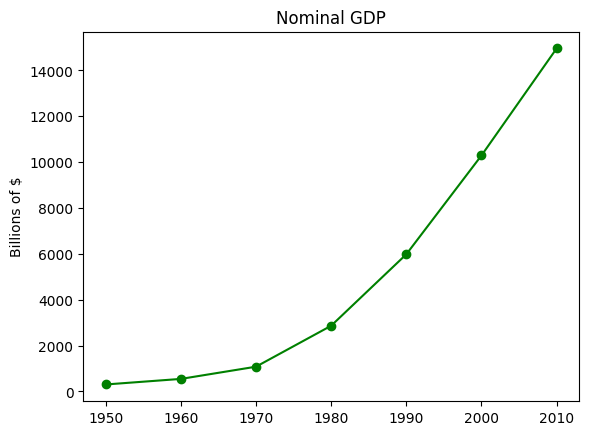

In [15]:
import matplotlib.pyplot as plt
from collections import Counter

def make_chart_simple_line_chart():

    years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
    gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

    # create a line chart, years on x-axis, gdp on y-axis
    plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

    # add a title
    plt.title("Nominal GDP")

    # add a label to the y-axis
    plt.ylabel("Billions of $")
    plt.show()

make_chart_simple_line_chart()

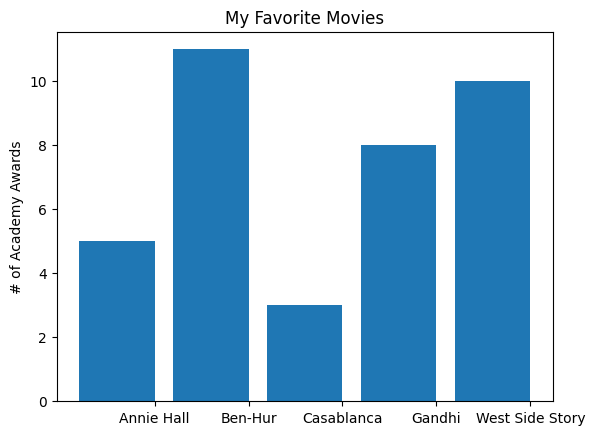

In [16]:

def make_chart_simple_bar_chart():

    movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
    num_oscars = [5, 11, 3, 8, 10]

    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates
    # so that each bar is centered
    xs = [i + 0.1 for i, _ in enumerate(movies)]

    # plot bars with left x-coordinates [xs], heights [num_oscars]
    plt.bar(xs, num_oscars)
    plt.ylabel("# of Academy Awards")
    plt.title("My Favorite Movies")

    # label x-axis with movie names at bar centers
    plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)

    plt.show()

make_chart_simple_bar_chart()

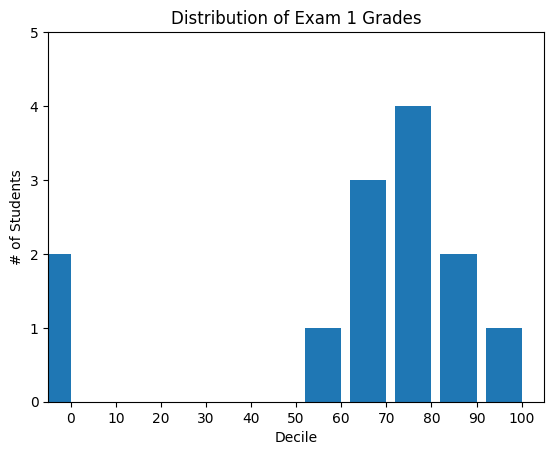

In [17]:
def make_chart_histogram():
    grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
    decile = lambda grade: grade // 10 * 10
    histogram = Counter(decile(grade) for grade in grades)

    plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 4
            histogram.values(),                # give each bar its correct height
            8)                                 # give each bar a width of 8
    plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                               # y-axis from 0 to 5
    plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
    plt.xlabel("Decile")
    plt.ylabel("# of Students")
    plt.title("Distribution of Exam 1 Grades")
    plt.show()

make_chart_histogram()

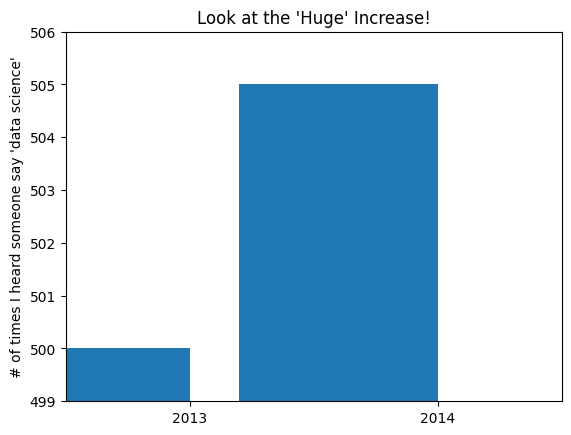

In [18]:
def make_chart_misleading_y_axis(mislead=True):

    mentions = [500, 505]
    years = [2013, 2014]

    plt.bar([2012.6, 2013.6], mentions, 0.8)
    plt.xticks(years)
    plt.ylabel("# of times I heard someone say 'data science'")

    # if you don't do this, matplotlib will label the x-axis 0, 1
    # and then add a +2.013e3 off in the corner (bad matplotlib!)
    plt.ticklabel_format(useOffset=False)

    if mislead:
        # misleading y-axis only shows the part above 500
        plt.axis([2012.5,2014.5,499,506])
        plt.title("Look at the 'Huge' Increase!")
    else:
        plt.axis([2012.5,2014.5,0,550])
        plt.title("Not So Huge Anymore.")
    plt.show()

make_chart_misleading_y_axis()

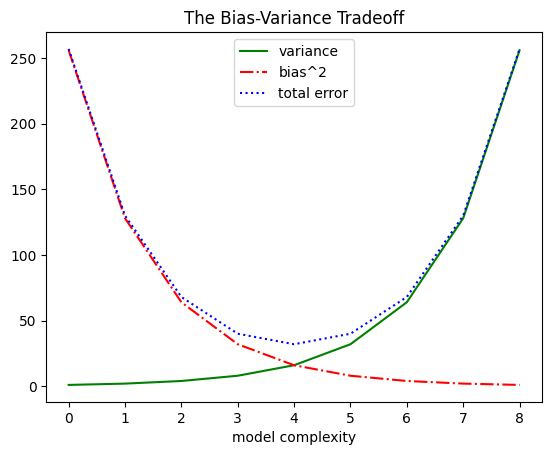

In [19]:
def make_chart_several_line_charts():

    variance     = [1,2,4,8,16,32,64,128,256]
    bias_squared = [256,128,64,32,16,8,4,2,1]
    total_error  = [x + y for x, y in zip(variance, bias_squared)]

    xs = range(len(variance))

    # we can make multiple calls to plt.plot
    # to show multiple series on the same chart
    plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
    plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
    plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

    # because we've assigned labels to each series
    # we can get a legend for free
    # loc=9 means "top center"
    plt.legend(loc=9)
    plt.xlabel("model complexity")
    plt.title("The Bias-Variance Tradeoff")
    plt.show()

make_chart_several_line_charts()

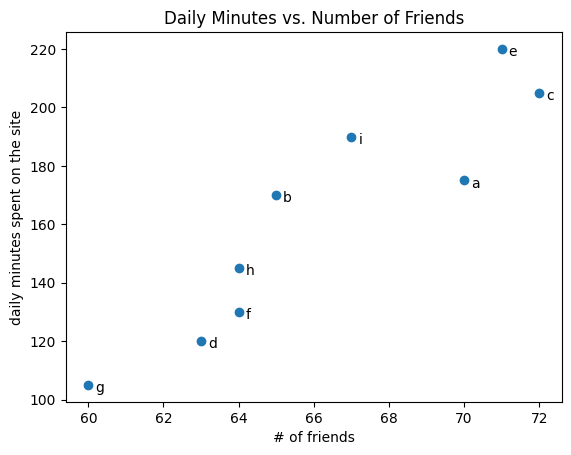

In [20]:
def make_chart_scatter_plot():

    friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
    minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
    labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

    plt.scatter(friends, minutes)

    # label each point
    for label, friend_count, minute_count in zip(labels, friends, minutes):
        plt.annotate(label,
                     xy=(friend_count, minute_count), # put the label with its point
                     xytext=(5, -5), # but slightly offset
                     textcoords='offset points')

    plt.title("Daily Minutes vs. Number of Friends")
    plt.xlabel("# of friends")
    plt.ylabel("daily minutes spent on the site")
    plt.show()

make_chart_scatter_plot()

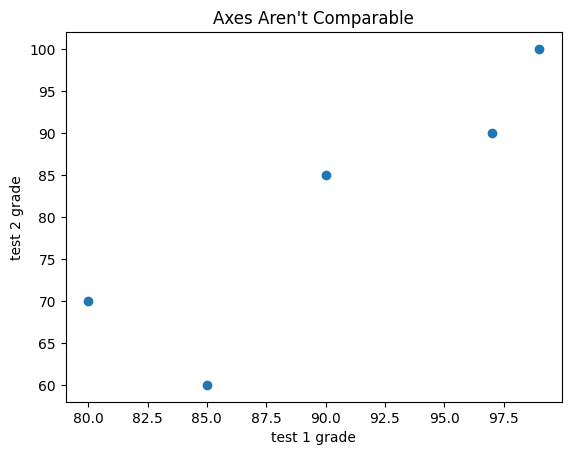

In [21]:
def make_chart_scatterplot_axes(equal_axes=False):

    test_1_grades = [ 99, 90, 85, 97, 80]
    test_2_grades = [100, 85, 60, 90, 70]

    plt.scatter(test_1_grades, test_2_grades)
    plt.xlabel("test 1 grade")
    plt.ylabel("test 2 grade")

    if equal_axes:
        plt.title("Axes Are Comparable")
        plt.axis("equal")
    else:
        plt.title("Axes Aren't Comparable")

    plt.show()

make_chart_scatterplot_axes()

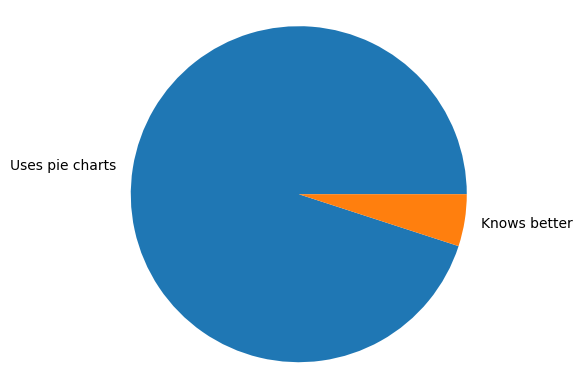

In [22]:
def make_chart_pie_chart():

    plt.pie([0.95, 0.05], labels=["Uses pie charts", "Knows better"])

    # make sure pie is a circle and not an oval
    plt.axis("equal")
    plt.show()

make_chart_pie_chart()

## Linear Algebra

In [29]:
from typing import List

Vector = List[float]

height_weight_age = [70,  # inches,
                     170, # pounds,
                     40 ] # years

grades = [95,   # exam1
          80,   # exam2
          75,   # exam3
          62 ]  # exam4

def add(v: Vector, w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i + w_i for v_i, w_i in zip(v, w)]

assert add([1, 2, 3], [4, 5, 6]) == [5, 7, 9]

def subtract(v: Vector, w: Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i - w_i for v_i, w_i in zip(v, w)]

assert subtract([5, 7, 9], [4, 5, 6]) == [1, 2, 3]

def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # Check that vectors is not empty
    assert vectors, "no vectors provided!"

    # Check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"

    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

assert vector_sum([[1, 2], [3, 4], [5, 6], [7, 8]]) == [16, 20]

def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

assert scalar_multiply(2, [1, 2, 3]) == [2, 4, 6]

def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

assert vector_mean([[1, 2], [3, 4], [5, 6]]) == [3, 4]

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

assert dot([1, 2, 3], [4, 5, 6]) == 32  # 1 * 4 + 2 * 5 + 3 * 6

def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

assert sum_of_squares([1, 2, 3]) == 14  # 1 * 1 + 2 * 2 + 3 * 3

In [30]:
import math

def magnitude(v: Vector) -> float:
    """Returns the magnitude (or length) of v"""
    return math.sqrt(sum_of_squares(v))   # math.sqrt is square root function

assert magnitude([3, 4]) == 5

def squared_distance(v: Vector, w: Vector) -> float:
    """Computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(subtract(v, w))

def distance(v: Vector, w: Vector) -> float:
    """Computes the distance between v and w"""
    return math.sqrt(squared_distance(v, w))


def distance(v: Vector, w: Vector) -> float:  # type: ignore
    return magnitude(subtract(v, w))

# Another type alias
Matrix = List[List[float]]

A = [[1, 2, 3],  # A has 2 rows and 3 columns
     [4, 5, 6]]

B = [[1, 2],     # B has 3 rows and 2 columns
     [3, 4],
     [5, 6]]

from typing import Tuple

def shape(A: Matrix) -> Tuple[int, int]:
    """Returns (# of rows of A, # of columns of A)"""
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0   # number of elements in first row
    return num_rows, num_cols

assert shape([[1, 2, 3], [4, 5, 6]]) == (2, 3)  # 2 rows, 3 columns

def get_row(A: Matrix, i: int) -> Vector:
    """Returns the i-th row of A (as a Vector)"""
    return A[i]             # A[i] is already the ith row

def get_column(A: Matrix, j: int) -> Vector:
    """Returns the j-th column of A (as a Vector)"""
    return [A_i[j]          # jth element of row A_i
            for A_i in A]   # for each row A_i

from typing import Callable

def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    """
    Returns a num_rows x num_cols matrix
    whose (i,j)-th entry is entry_fn(i, j)
    """
    return [[entry_fn(i, j)             # given i, create a list
             for j in range(num_cols)]  #   [entry_fn(i, 0), ... ]
            for i in range(num_rows)]   # create one list for each i

def identity_matrix(n: int) -> Matrix:
    """Returns the n x n identity matrix"""
    return make_matrix(n, n, lambda i, j: 1 if i == j else 0)

assert identity_matrix(5) == [[1, 0, 0, 0, 0],
                              [0, 1, 0, 0, 0],
                              [0, 0, 1, 0, 0],
                              [0, 0, 0, 1, 0],
                              [0, 0, 0, 0, 1]]

## Statistics

7.333333333333333
6.0
1
3
[6, 1]
99.0


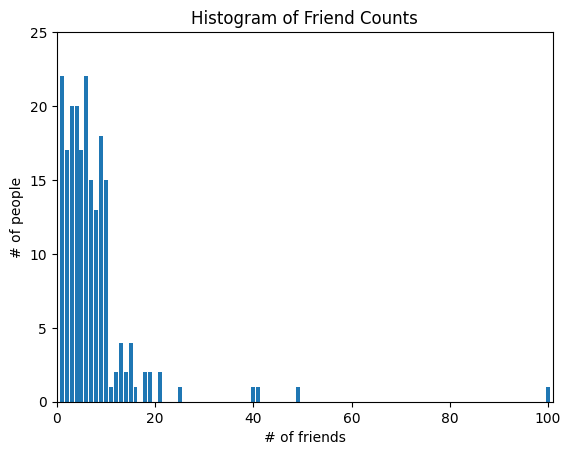

In [35]:

num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

from collections import Counter
import matplotlib.pyplot as plt

friend_counts = Counter(num_friends)
xs = range(101)                         # largest value is 100
ys = [friend_counts[x] for x in xs]     # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
# plt.show()

num_points = len(num_friends)               # 204


assert num_points == 204

largest_value = max(num_friends)            # 100
smallest_value = min(num_friends)           # 1


assert largest_value == 100
assert smallest_value == 1

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]           # 1
second_smallest_value = sorted_values[1]    # 1
second_largest_value = sorted_values[-2]    # 49


assert smallest_value == 1
assert second_smallest_value == 1
assert second_largest_value == 49


from typing import List

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

mean(num_friends)   # 7.333333


assert 7.3333 < mean(num_friends) < 7.3334

# The underscores indicate that these are "private" functions, as they're
# intended to be called by our median function but not by other people
# using our statistics library.
def _median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2  # e.g. length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    """Finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2


assert median(num_friends) == 6

def quantile(xs: List[float], p: float) -> float:
    """Returns the pth-percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

def mode(x: List[float]) -> List[float]:
    """Returns a list, since there might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

assert set(mode(num_friends)) == {1, 6}

# "range" already means something in Python, so we'll use a different name
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

assert data_range(num_friends) == 99

# example using each of these functions
print(mean(num_friends))
print(median(num_friends))
print(quantile(num_friends, 0.10))
print(quantile(num_friends, 0.25))
print(mode(num_friends))
print(data_range(num_friends))

In [34]:
def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

assert 81.54 < variance(num_friends) < 81.55

import math

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

assert 9.02 < standard_deviation(num_friends) < 9.04

def interquartile_range(xs: List[float]) -> float:
    """Returns the difference between the 75%-ile and the 25%-ile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

assert interquartile_range(num_friends) == 6


daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

daily_hours = [dm / 60 for dm in daily_minutes]

# example for using each of these functions
# print(de_mean(daily_hours))
print(variance(daily_hours))
print(standard_deviation(daily_hours))
print(quantile(daily_hours, 0.90))
print(interquartile_range(daily_hours))

0.027996083042891483
0.1673203007494652
0.6761666666666667
0.21916666666666662


In [36]:
def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"

    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

assert 22.42 < covariance(num_friends, daily_minutes) < 22.43
assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60

def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero

assert 0.24 < correlation(num_friends, daily_minutes) < 0.25
assert 0.24 < correlation(num_friends, daily_hours) < 0.25

outlier = num_friends.index(100)    # index of outlier

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]

assert 0.57 < correlation(num_friends_good, daily_minutes_good) < 0.58
assert 0.57 < correlation(num_friends_good, daily_hours_good) < 0.58

## Probability

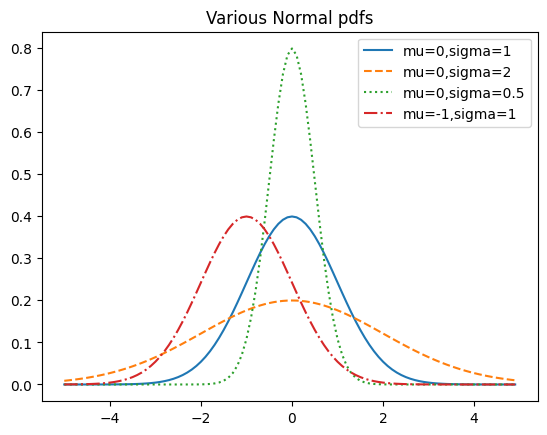

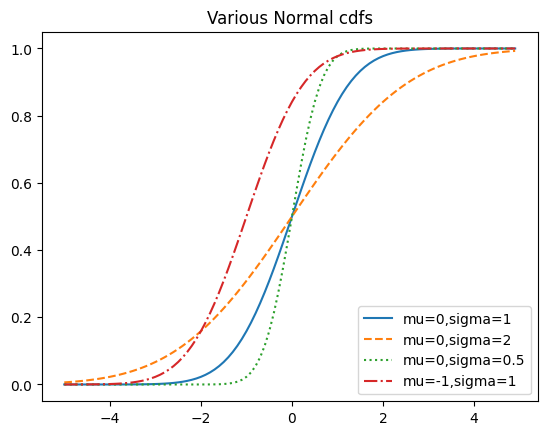

<Figure size 640x480 with 0 Axes>

In [45]:
def uniform_cdf(x: float) -> float:
    """Returns the probability that a uniform random variable is <= x"""
    if x < 0:   return 0    # uniform random is never less than 0
    elif x < 1: return x    # e.g. P(X <= 0.4) = 0.4
    else:       return 1    # uniform random is always less than 1

import math
SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

import matplotlib.pyplot as plt
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()


# plt.savefig('im/various_normal_pdfs.png')
plt.gca().clear()
plt.close()
plt.clf()

def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()


plt.close()
plt.gca().clear()
plt.clf()

def inverse_normal_cdf(p: float,
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    """Find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            low_z = mid_z              # Midpoint too low, search above it
        else:
            hi_z = mid_z               # Midpoint too high, search below it

    return mid_z


import random

def bernoulli_trial(p: float) -> int:
    """Returns 1 with probability p and 0 with probability 1-p"""
    return 1 if random.random() < p else 0

def binomial(n: int, p: float) -> int:
    """Returns the sum of n bernoulli(p) trials"""
    return sum(bernoulli_trial(p) for _ in range(n))

from collections import Counter

def binomial_histogram(p: float, n: int, num_points: int) -> None:
    """Picks points from a Binomial(n, p) and plots their histogram"""
    data = [binomial(n, p) for _ in range(num_points)]

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
#     plt.show()


In [47]:
import enum, random

# An Enum is a typed set of enumerated values. We can use them
# to make our code more descriptive and readable.
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1

print("P(both | older):", both_girls / older_girl)     # 0.514 ~ 1/2
print("P(both | either): ", both_girls / either_girl)  # 0.342 ~ 1/3



assert 0.48 < both_girls / older_girl < 0.52
assert 0.30 < both_girls / either_girl < 0.35

# def uniform_pdf(x: float) -> float:
#     return 1 if 0 <= x < 1 else 0
    

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325



## Hypothesis and Inference

In [55]:
import math, random

def normal_approximation_to_binomial(n, p):
    """finds mu and sigma corresponding to a Binomial(n, p)"""
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    return mu, sigma

#####
#
# probabilities a normal lies in an interval
#
######

# the normal cdf _is_ the probability the variable is below a threshold
normal_probability_below = normal_cdf

# it's above the threshold if it's not below the threshold
def normal_probability_above(lo, mu=0, sigma=1):
    return 1 - normal_cdf(lo, mu, sigma)

# it's between if it's less than hi, but not less than lo
def normal_probability_between(lo, hi, mu=0, sigma=1):
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

# it's outside if it's not between
def normal_probability_outside(lo, hi, mu=0, sigma=1):
    return 1 - normal_probability_between(lo, hi, mu, sigma)



In [56]:
######
#
#  normal bounds
#
######


def normal_upper_bound(probability, mu=0, sigma=1):
    """returns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability, mu=0, sigma=1):
    """returns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1 - probability, mu, sigma)

def normal_two_sided_bounds(probability, mu=0, sigma=1):
    """returns the symmetric (about the mean) bounds
    that contain the specified probability"""
    tail_probability = (1 - probability) / 2

    # upper bound should have tail_probability above it
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)

    # lower bound should have tail_probability below it
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)

    return lower_bound, upper_bound

def two_sided_p_value(x, mu=0, sigma=1):
    if x >= mu:
        # if x is greater than the mean, the tail is above x
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # if x is less than the mean, the tail is below x
        return 2 * normal_probability_below(x, mu, sigma)

def count_extreme_values():
    extreme_value_count = 0
    for _ in range(100000):
        num_heads = sum(1 if random.random() < 0.5 else 0    # count # of heads
                        for _ in range(1000))                # in 1000 flips
        if num_heads >= 530 or num_heads <= 470:             # and count how often
            extreme_value_count += 1                         # the # is 'extreme'

    return extreme_value_count / 100000

upper_p_value = normal_probability_above
lower_p_value = normal_probability_below

In [57]:
##
#
# P-hacking
#
##

def run_experiment():
    """flip a fair coin 1000 times, True = heads, False = tails"""
    return [random.random() < 0.5 for _ in range(1000)]

def reject_fairness(experiment):
    """using the 5% significance levels"""
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531

In [58]:
##
#
# running an A/B test
#
##

def estimated_parameters(N, n):
    p = n / N
    sigma = math.sqrt(p * (1 - p) / N)
    return p, sigma

def a_b_test_statistic(N_A, n_A, N_B, n_B):
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)

In [59]:
##
#
# Bayesian Inference
#
##

def B(alpha, beta):
    """a normalizing constant so that the total probability is 1"""
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

def beta_pdf(x, alpha, beta):
    if x < 0 or x > 1:          # no weight outside of [0, 1]
        return 0
    return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)

In [60]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
print("mu_0", mu_0)
print("sigma_0", sigma_0)
print("normal_two_sided_bounds(0.95, mu_0, sigma_0)", normal_two_sided_bounds(0.95, mu_0, sigma_0))
print()
print("power of a test")

print("95% bounds based on assumption p is 0.5")

lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)
print("lo", lo)
print("hi", hi)

print("actual mu and sigma based on p = 0.55")
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)
print("mu_1", mu_1)
print("sigma_1", sigma_1)

# a type 2 error means we fail to reject the null hypothesis
# which will happen when X is still in our original interval
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
power = 1 - type_2_probability # 0.887

print("type 2 probability", type_2_probability)
print("power", power)
print

print("one-sided test")
hi = normal_upper_bound(0.95, mu_0, sigma_0)
print("hi", hi) # is 526 (< 531, since we need more probability in the upper tail)
type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
power = 1 - type_2_probability # = 0.936
print("type 2 probability", type_2_probability)
print("power", power)
print()

print("two_sided_p_value(529.5, mu_0, sigma_0)", two_sided_p_value(529.5, mu_0, sigma_0))

print("two_sided_p_value(531.5, mu_0, sigma_0)", two_sided_p_value(531.5, mu_0, sigma_0))

print("upper_p_value(525, mu_0, sigma_0)", upper_p_value(525, mu_0, sigma_0))
print("upper_p_value(527, mu_0, sigma_0)", upper_p_value(527, mu_0, sigma_0))
print()

print("P-hacking")

random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment
                        for experiment in experiments
                        if reject_fairness(experiment)])

print(num_rejections, "rejections out of 1000")
print()

print("A/B testing")
z = a_b_test_statistic(1000, 200, 1000, 180)
print("a_b_test_statistic(1000, 200, 1000, 180)", z)
print("p-value", two_sided_p_value(z))
z = a_b_test_statistic(1000, 200, 1000, 150)
print("a_b_test_statistic(1000, 200, 1000, 150)", z)
print("p-value", two_sided_p_value(z))

mu_0 500.0
sigma_0 15.811388300841896
normal_two_sided_bounds(0.95, mu_0, sigma_0) (469.01026640487555, 530.9897335951244)

power of a test
95% bounds based on assumption p is 0.5
lo 469.01026640487555
hi 530.9897335951244
actual mu and sigma based on p = 0.55
mu_1 550.0
sigma_1 15.732132722552274
type 2 probability 0.11345199870463285
power 0.8865480012953671
one-sided test
hi 526.0073585242053
type 2 probability 0.06362051966928267
power 0.9363794803307173

two_sided_p_value(529.5, mu_0, sigma_0) 0.06207721579598835
two_sided_p_value(531.5, mu_0, sigma_0) 0.046345287837786575
upper_p_value(525, mu_0, sigma_0) 0.056923149003329065
upper_p_value(527, mu_0, sigma_0) 0.04385251499101184

P-hacking
46 rejections out of 1000

A/B testing
a_b_test_statistic(1000, 200, 1000, 180) -1.1403464899034472
p-value 0.254141976542236
a_b_test_statistic(1000, 200, 1000, 150) -2.948839123097944
p-value 0.003189699706216853


## Gradient Descent

In [63]:
from collections import Counter
from functools import reduce
import math, random

def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

def plot_estimated_derivative():

    def square(x):
        return x * x

    def derivative(x):
        return 2 * x

    derivative_estimate = lambda x: difference_quotient(square, x, h=0.00001)

    # plot to show they're basically the same
    import matplotlib.pyplot as plt
    x = range(-10,10)
    plt.plot(x, map(derivative, x), 'rx')           # red  x
    plt.plot(x, map(derivative_estimate, x), 'b+')  # blue +
    plt.show()                                      # purple *, hopefully

def partial_difference_quotient(f, v, i, h):

    # add h to just the i-th element of v
    w = [v_j + (h if j == i else 0)
         for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h

def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]

def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

def safe(f):
    """define a new function that wraps f and return it"""
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')         # this means "infinity" in Python
    return safe_f

In [64]:
#
#
# minimize / maximize batch
#
#

def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    """use gradient descent to find theta that minimizes target function"""

    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

    theta = theta_0                           # set theta to initial value
    target_fn = safe(target_fn)               # safe version of target_fn
    value = target_fn(theta)                  # value we're minimizing

    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                       for step_size in step_sizes]

        # choose the one that minimizes the error function
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)

        # stop if we're "converging"
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value

def negate(f):
    """return a function that for any input x returns -f(x)"""
    return lambda *args, **kwargs: -f(*args, **kwargs)

def negate_all(f):
    """the same when f returns a list of numbers"""
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn),
                          negate_all(gradient_fn),
                          theta_0,
                          tolerance)

In [66]:
#
# minimize / maximize stochastic
#

def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)]  # create a list of indexes
    random.shuffle(indexes)                    # shuffle them
    for i in indexes:                          # return the data in that order
        yield data[i]

def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):

    data = list(zip(x, y))
    theta = theta_0                             # initial guess
    alpha = alpha_0                             # initial step size
    min_theta, min_value = None, float("inf")   # the minimum so far
    iterations_with_no_improvement = 0

    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data )

        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9

        # and take a gradient step for each of the data points
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))

    return min_theta

def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochastic(negate(target_fn),
                               negate_all(gradient_fn),
                               x, y, theta_0, alpha_0)

In [68]:
print("using the gradient")

v = [random.randint(-10,10) for i in range(3)]

tolerance = 0.0000001

while True:
    #print v, sum_of_squares(v)
    gradient = sum_of_squares_gradient(v)   # compute the gradient at v
    next_v = step(v, gradient, -0.01)       # take a negative gradient step
    if distance(next_v, v) < tolerance:     # stop if we're converging
        break
    v = next_v                              # continue if we're not

print("minimum v", v)
print("minimum value", sum_of_squares(v))
print()


print("using minimize_batch")

v = [random.randint(-10,10) for i in range(3)]

v = minimize_batch(sum_of_squares, sum_of_squares_gradient, v)

print("minimum v", v)
print("minimum value", sum_of_squares(v))

using the gradient
minimum v [-3.085683073571555e-06, 3.085683073571555e-06, 2.314262305178667e-06]
minimum value 2.4398690078222872e-11

using minimize_batch
minimum v [-0.0008307674973655728, 0.00016615349947311455, 0.0013292279957849164]
minimum value 2.484628684844605e-06
